### <font color='navy'>Name: <i>Oleksii Hayvoronskyi</i></font>
#### <font color='cadetblue4'>Group: <i>Data Scientists (PDS4)</i></font>

## <center><font color='darkgreen'>USA Real Estate PRICE PREDICTION</font></center>

# <center><font color='blue'>Stage 1. Data set research:</font></center>

#### <em><font color='darkgoldenrod'>Link to the USA Real Estate Dataset:</font></em>
* https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/code

<h4><font color='lavenderblush4'>This dataset contains Real Estate listings in the US broken by twelve State and zip code<font>.<h4>

In [116]:
# Required Libraries.
import time
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

from explainerdashboard import RegressionExplainer, ExplainerDashboard

import warnings
warnings.filterwarnings("ignore")

# <center><font color='blue'>Stage 1. Data set research</font></center>

In [3]:
# Read a dataset.
df_realtor = pd.read_csv('realtor-data.csv')
df_realtor

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0


In [4]:
df_realtor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [5]:
# List of the all states.
print(df_realtor['state'].unique())

['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia']


In [6]:
# Removing columns that not need to further analysis.
df_realtor_new = df_realtor.drop(['status', 'zip_code', 'prev_sold_date'], axis=1)
df_realtor_new

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,65000.0
...,...,...,...,...,...,...,...
99995,3.0,3.0,NaN,Hudson,Massachusetts,2864.0,749900.0
99996,2.0,1.0,0.34,Auburn,Massachusetts,1075.0,349900.0
99997,3.0,2.0,1.01,Shrewsbury,Massachusetts,1632.0,549000.0
99998,3.0,2.0,0.12,Worcester,Massachusetts,1332.0,299000.0


In [7]:
# Rename a column 'acre_lot' into a column 'total_land_size(acres)'
df_realtor_new.rename(columns = {'acre_lot':'land_size(acres)'}, inplace=True)
df_realtor_new

,bed,bath,land_size(acres),city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,65000.0
...,...,...,...,...,...,...,...
99995,3.0,3.0,NaN,Hudson,Massachusetts,2864.0,749900.0
99996,2.0,1.0,0.34,Auburn,Massachusetts,1075.0,349900.0
99997,3.0,2.0,1.01,Shrewsbury,Massachusetts,1632.0,549000.0
99998,3.0,2.0,0.12,Worcester,Massachusetts,1332.0,299000.0


In [8]:
# Checking duplicates in the dataset.
print('Number of duplicates :', df_realtor_new.duplicated().sum())

Number of duplicates : 85401


In [9]:
# Removing all duplicates in the dataset.
df_realtor_new.drop_duplicates(inplace=True)

# Checking duplicates after removed.
df_realtor_new.duplicated().sum()
print('Number of duplicates after removed:', df_realtor_new.duplicated().sum())

Number of duplicates after removed: 0


In [10]:
# Checking a missing data.
print('Columns and missing data:')
df_realtor_new.isnull().sum()

Columns and missing data:


bed                 3326
bath                3326
land_size(acres)    1833
city                  16
state                  0
house_size          3325
price                  0
dtype: int64

In [11]:
# Replace missing values.
df_realtor_new['bed'].fillna(df_realtor_new['bed'].median(), inplace=True)
df_realtor_new['bath'].fillna(df_realtor_new['bath'].median(), inplace=True)
df_realtor_new['house_size'].fillna(df_realtor_new['house_size'].median(), inplace=True)
df_realtor_new['land_size(acres)'].fillna(df_realtor_new['land_size(acres)'].median(), inplace=True)
df_realtor_new.dropna(subset=['city'], inplace=True)

# Checking missing values again.
df_realtor_new.isnull().sum()

bed                 0
bath                0
land_size(acres)    0
city                0
state               0
house_size          0
price               0
dtype: int64

In [12]:
# All columns in the dataset are of the same dimension.
df_realtor_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14583 entries, 0 to 97288
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bed               14583 non-null  float64
 1   bath              14583 non-null  float64
 2   land_size(acres)  14583 non-null  float64
 3   city              14583 non-null  object 
 4   state             14583 non-null  object 
 5   house_size        14583 non-null  float64
 6   price             14583 non-null  float64
dtypes: float64(5), object(2)
memory usage: 911.4+ KB


In [13]:
# First five houses with the smallest price.
# We can see that houses price with the same house size don't have the same price.
df_realtor_new.nsmallest(5, 'price')

,bed,bath,land_size(acres),city,state,house_size,price
33851,3.0,2.0,0.50,Hinsdale,New Hampshire,1759.5,445.0
29835,3.0,2.0,0.31,Hubbardston,Massachusetts,1759.5,7900.0
28305,3.0,2.0,0.28,Becket,Massachusetts,1759.5,9500.0
28229,3.0,2.0,0.67,Florida,Massachusetts,1759.5,9900.0
28225,3.0,2.0,0.46,Florida,Massachusetts,1759.5,10000.0


In [14]:
# First five houses with the highest price.
# We can see that houses with the highest price don't have the largest land size.
df_realtor_new.nlargest(5, 'price')

,bed,bath,land_size(acres),city,state,house_size,price
40599,9.0,10.0,400.00,Woodstock,Connecticut,18777.0,60000000.0
2791,3.0,2.0,100.00,Isabela,Puerto Rico,1759.5,25000000.0
11799,3.0,2.0,618.36,Christiansted,Virgin Islands,1759.5,24500000.0
11292,3.0,2.0,130.00,Saint Thomas,Virgin Islands,1759.5,23000000.0
11674,3.0,2.0,744.00,Christiansted,Virgin Islands,1759.5,22500000.0


In [16]:
# Grouping to 'state' and 'price'.
df_group = df_realtor_new.groupby(['state', 'price']).sum()
print(df_group)

                           bed  bath  land_size(acres)  house_size
state          price                                              
Connecticut    14900.0     3.0   2.0              1.75      1759.5
               16000.0     3.0   2.0              0.33      1759.5
               19900.0     6.0   4.0              2.64      3519.0
               20000.0     3.0   2.0              1.00      1038.0
               24900.0     4.0   3.0              0.68      2215.5
...                        ...   ...               ...         ...
Virgin Islands 17500000.0  3.0   2.0           2377.00      1759.5
               22500000.0  3.0   2.0            744.00      1759.5
               23000000.0  3.0   2.0            130.00      1759.5
               24500000.0  3.0   2.0            618.36      1759.5
Virginia       75000.0     3.0   2.0              0.50      1759.5

[4330 rows x 4 columns]


In [17]:
# Making correlation with standard correlation coefficient 'pearson'.
get_corr = df_realtor_new.corr(method='pearson')
get_corr.style.background_gradient(cmap='gist_ncar')

,bed,bath,land_size(acres),house_size,price
bed,1.000000,0.698810,-0.001396,0.084924,0.216265
bath,0.698810,1.000000,0.003246,0.112856,0.413197
land_size(acres),-0.001396,0.003246,1.000000,0.038815,0.026832
house_size,0.084924,0.112856,0.038815,1.000000,0.116207
price,0.216265,0.413197,0.026832,0.116207,1.000000


#  <center><font color='blue'>Stage 2. Dataset Visualization</font></center>

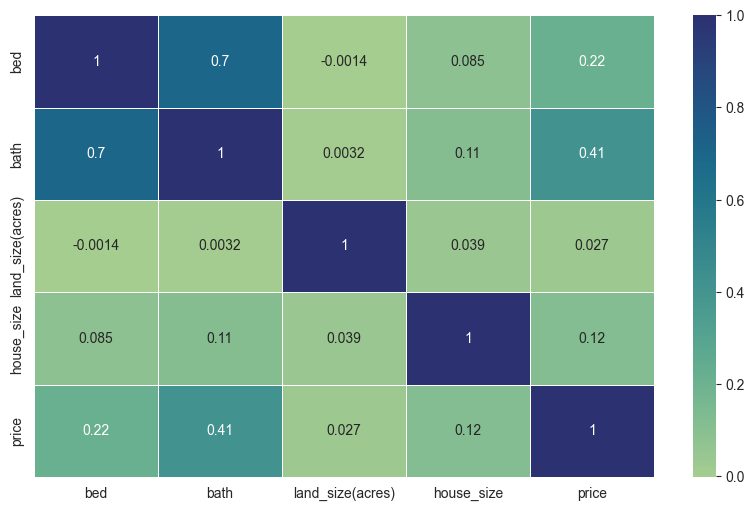

In [18]:
# Visualisation correlation.
plt.figure(figsize=(10, 6))
sns.heatmap(df_realtor_new.corr(), annot=True, linewidth=.4, cmap='crest')
plt.show()

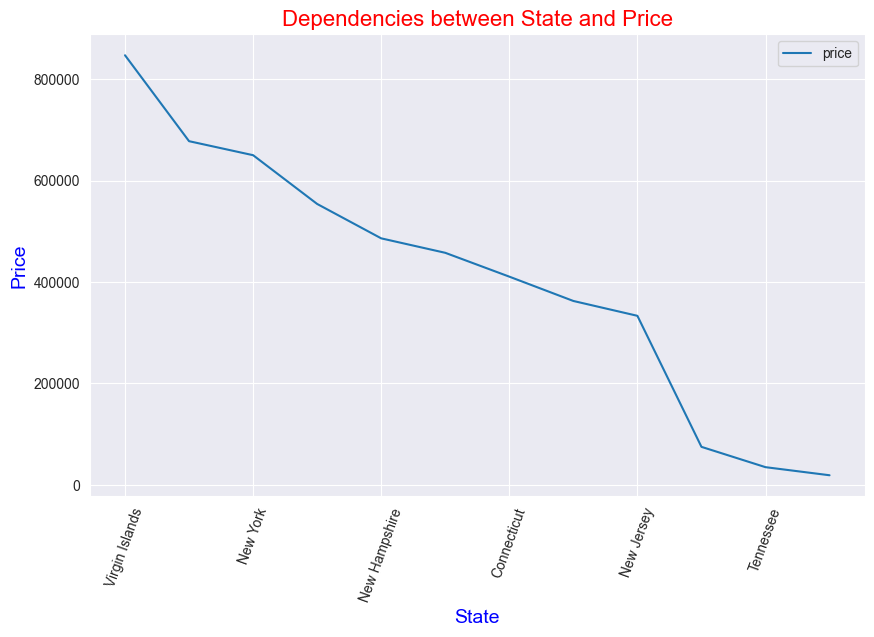

In [19]:
# Combining two columns to know relationship.
plot = df_realtor_new.pivot_table(
    index=['state'], values='price').sort_values('price', ascending=False)

plot.plot(figsize=(10, 6))
plt.title('Dependencies between State and Price', fontsize=16, color='r')
plt.xlabel('State', fontsize=14, color='b')
plt.ylabel('Price', fontsize=14, color='b')
plt.title('Dependencies between State and Price', size=16)
plt.xticks(rotation=70)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Puerto Rico'),
  Text(1, 0, 'Virgin Islands'),
  Text(2, 0, 'Massachusetts'),
  Text(3, 0, 'Connecticut'),
  Text(4, 0, 'New Hampshire'),
  Text(5, 0, 'Vermont'),
  Text(6, 0, 'New Jersey'),
  Text(7, 0, 'New York'),
  Text(8, 0, 'South Carolina'),
  Text(9, 0, 'Tennessee'),
  Text(10, 0, 'Rhode Island'),
  Text(11, 0, 'Virginia')])

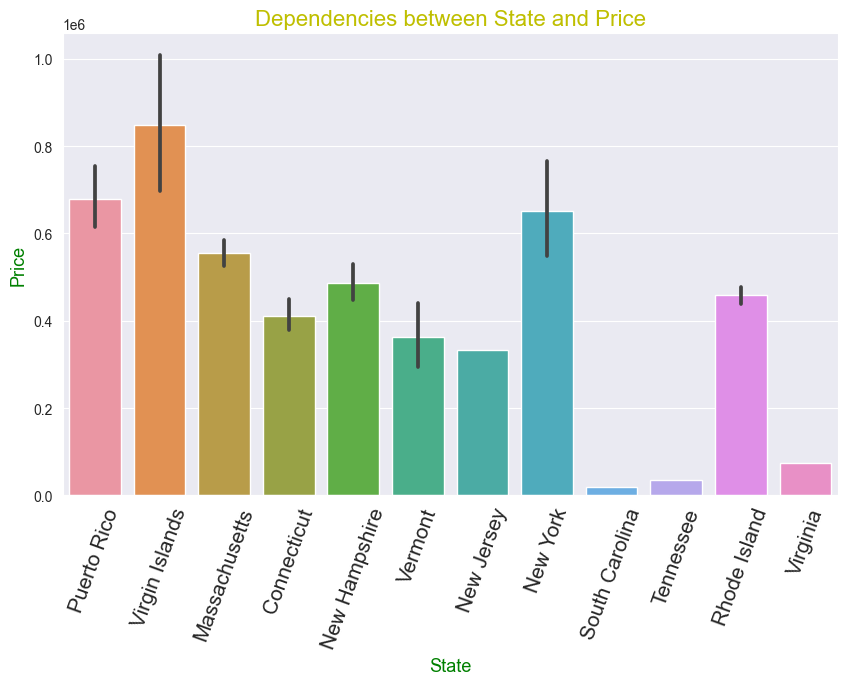

In [23]:
# Combining two columns 'state' and 'price' to know relationship.
plt.figure(figsize=(10, 6))
sns.barplot(data=df_realtor_new, x='state', y='price')
plt.title('Dependencies between State and Price', fontsize=16, color='y')
plt.xlabel('State', fontsize=13, color='g')
plt.ylabel('Price', fontsize=13, color='g')
plt.xticks(rotation=70, fontsize=15)

[Text(-90, 0, '4765654.0 USD'),
 Text(-90, 0, '4162114.0 USD'),
 Text(-90, 0, '3835786.0 USD'),
 Text(-90, 0, '3247611.0 USD'),
 Text(-90, 0, '3007700.0 USD'),
 Text(-90, 0, '2728833.0 USD'),
 Text(-90, 0, '2313406.0 USD'),
 Text(-90, 0, '2224776.0 USD'),
 Text(-90, 0, '2157694.0 USD'),
 Text(-90, 0, '2148516.0 USD'),
 Text(-90, 0, '2111376.0 USD'),
 Text(-90, 0, '1993000.0 USD'),
 Text(-90, 0, '1937500.0 USD'),
 Text(-90, 0, '1887952.0 USD'),
 Text(-90, 0, '1885000.0 USD')]

<Figure size 2500x900 with 0 Axes>

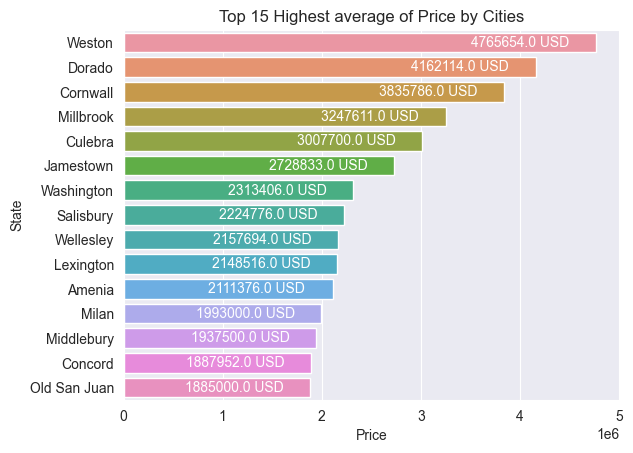

In [22]:
# Display the highest average of prices by cities.
city_hight_price = \
    df_realtor_new['price'].groupby(df_realtor_new['city']).mean().round(0).nlargest(15).sort_values(ascending=False).reset_index()

# Making subplot figure.
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=city_hight_price, y=city_hight_price.city, x=city_hight_price.price)
ax.set(ylabel='State', xlabel='Price', title='Top 15 Highest average of Price by Cities')
ax.bar_label(ax.containers[0],
             padding = -90, color='white', fontsize=10, label_type='edge', fmt='%.1f USD')

[Text(-67, 0, '92500.0 USD'),
 Text(-67, 0, '92450.0 USD'),
 Text(-67, 0, '89969.0 USD'),
 Text(-67, 0, '78297.0 USD'),
 Text(-67, 0, '75000.0 USD'),
 Text(-67, 0, '75000.0 USD'),
 Text(-67, 0, '71667.0 USD'),
 Text(-67, 0, '70000.0 USD'),
 Text(-67, 0, '65000.0 USD'),
 Text(-67, 0, '63500.0 USD'),
 Text(-67, 0, '57500.0 USD'),
 Text(-67, 0, '55000.0 USD'),
 Text(-67, 0, '34900.0 USD'),
 Text(-67, 0, '28000.0 USD'),
 Text(-67, 0, '18950.0 USD')]

<Figure size 2500x900 with 0 Axes>

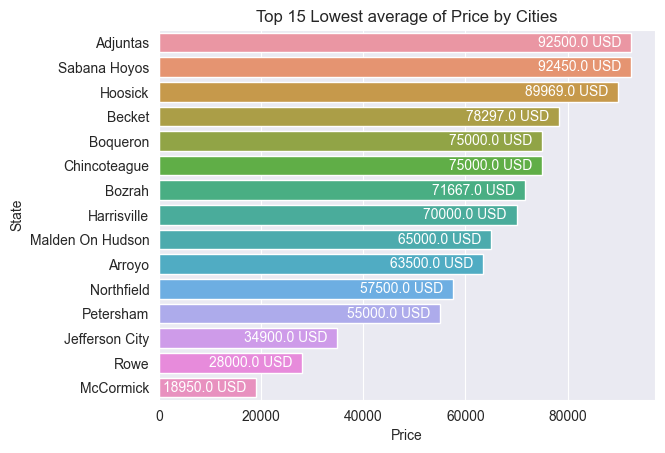

In [24]:
# Display the lowest average of prices by cities
city_low_price = \
    df_realtor_new['price'].groupby(df_realtor_new['city']).mean().round(0).nsmallest(15).sort_values(ascending = False).reset_index()

# Making subplot figure.
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=city_low_price , y=city_low_price.city, x=city_low_price.price)
ax.set(ylabel='State', xlabel='Price', title='Top 15 Lowest average of Price by Cities')
ax.bar_label(ax.containers[0],
             padding = -67, color='white', fontsize=10, label_type='edge', fmt='%.1f USD')

In [22]:
# Making a barplot of plotly express.
fig = px.bar(df_realtor_new, x='state', y='price', color='city',
             title='Real estate prices in cities by US state')
fig.show()

In [25]:
# Representing states of USA from this dataset.
fig = px.choropleth(df_realtor_new,
                    locations=['PR', 'VI', 'MA', 'CT', 'NH', 'VT', 'NJ', 'NY', 'SC', 'TN', 'RI', 'VA'],
                    locationmode='USA-states', color=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                    scope='usa')
fig.update_layout(title='Ten US States under research for Real Estate Prices')
fig.show()

'''
Twelve USA States.
Ten of the twelve are presented on the map:

PR - Puerto Rico - not represented on the map (located near Great Britian)
VI - Virgin Islands - not represented on the map (located near Great Britian)
MA - Massachusetts
CT - Connecticut
NH - New Hampshire
VT - Vermont
NJ - New Jersey
NY - New York
SC - South Carolina
TN - Tennessee
RI - Rhode Island
VA - Virginia
'''

'\nTwelve USA States.\nTen of the twelve are presented on the map:\n\nPR - Puerto Rico - not represented on the map (located near Great Britian)\nVI - Virgin Islands - not represented on the map (located near Great Britian)\nMA - Massachusetts\nCT - Connecticut\nNH - New Hampshire\nVT - Vermont\nNJ - New Jersey\nNY - New York\nSC - South Carolina\nTN - Tennessee\nRI - Rhode Island\nVA - Virginia\n'

#  <center><font color='blue'>Stage 3. Transforming and standardization data</font></center>

In [26]:
# Transforming data with the LabelEncoder, and fitting.
lab_enc = LabelEncoder()
df_realtor_new['city'] = lab_enc.fit_transform(df_realtor_new['city'])
df_realtor_new['state'] = lab_enc.fit_transform(df_realtor_new['state'])
df_realtor_new['bed'] = lab_enc.fit_transform(df_realtor_new['bed'])
df_realtor_new['bath'] = lab_enc.fit_transform(df_realtor_new['bath'])
df_realtor_new['land_size(acres)'] = lab_enc.fit_transform(df_realtor_new['land_size(acres)'])
df_realtor_new['house_size'] = lab_enc.fit_transform(df_realtor_new['house_size'])
df_realtor_new['price'] = lab_enc.fit_transform(df_realtor_new['price'])
df_realtor_new

,bed,bath,land_size(acres),city,state,house_size,price
0,2,1,12,2,5,318,321
1,3,1,8,2,5,896,239
2,1,0,15,224,5,171,184
3,3,1,10,360,5,1152,439
4,5,1,5,268,5,1114,179
...,...,...,...,...,...,...,...
96947,2,1,90,56,6,1083,1374
96952,3,2,24,34,6,1487,1418
96953,1,1,50,302,1,1063,1282
97265,2,1,36,157,1,815,1087


<AxesSubplot: >

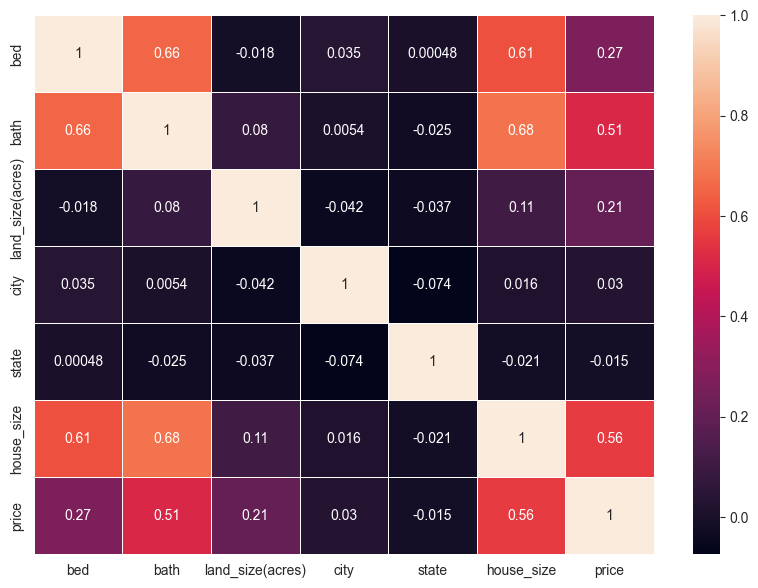

In [27]:
# Visualisation correlation after transformed by LabelEncoder.
plt.figure(figsize=(10, 7))
sns.heatmap(df_realtor_new.corr(), annot=True, linewidth=.4)

In [28]:
# Data set standardization.
df_realtor_new['house_size'] = \
    StandardScaler().fit_transform(df_realtor_new['house_size'].values.reshape(len(df_realtor_new), 1))
# df_realtor_new['price'] = \
    # StandardScaler().fit_transform(df_realtor_new['price'].values.reshape(len(df_realtor_new), 1))
df_realtor_new['bed'] = \
    StandardScaler().fit_transform(df_realtor_new['bed'].values.reshape(len(df_realtor_new), 1))
df_realtor_new['bath'] = \
    StandardScaler().fit_transform(df_realtor_new['bath'].values.reshape(len(df_realtor_new), 1))
df_realtor_new['land_size(acres)'] = \
    StandardScaler().fit_transform(df_realtor_new['land_size(acres)'].values.reshape(len(df_realtor_new), 1))
df_realtor_new['city'] = \
    StandardScaler().fit_transform(df_realtor_new['city'].values.reshape(len(df_realtor_new), 1))
df_realtor_new['state'] = \
    StandardScaler().fit_transform(df_realtor_new['state'].values.reshape(len(df_realtor_new), 1))

#  <center><font color='blue'>Stage 4. Splitting data into a train and a test.</font></center>
# <center><font color='blue'>Models Building</font></center>

## <font color='lightpink4'>Linear Regression model</font>

In [29]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']


# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
# Creating the Linear Regression model and fitting data.
lin_reg = LinearRegression().fit(X_train, y_train)
LinearRegression()

LinearRegression()

== Prediction ==


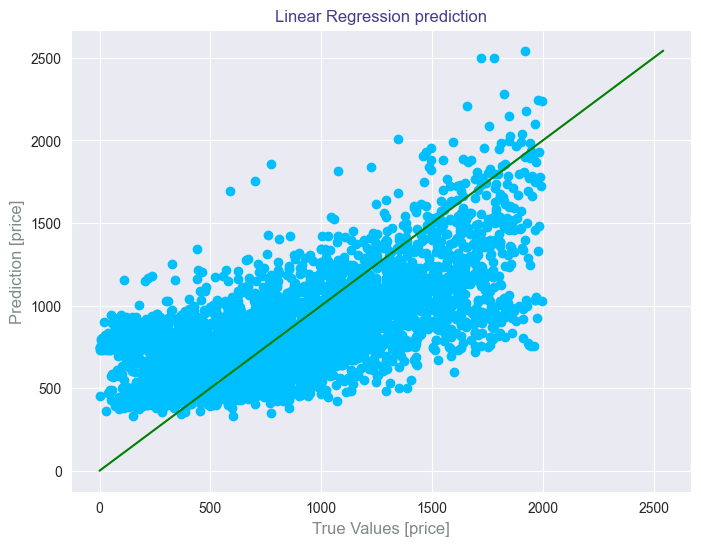

In [31]:
# Getting prediction.
print('== Prediction ==')
y_pred_lin = lin_reg.predict(X_test)

# Visualization of prediction.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, color='#00BFFF')
plt.yscale("linear")
plt.xscale('linear')

# Making lines of the plot.
line_1 = max(max(y_pred_lin), max(y_test))
line_2 = min(min(y_pred_lin), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'g')
plt.title('Linear Regression prediction', color='#483D8B')
plt.xlabel('True Values [price]', fontsize=12, color='#808A87')
plt.ylabel('Prediction [price]', fontsize=12, color='#808A87')
plt.show()

<AxesSubplot: title={'center': 'Data Distribution of Linear Regression'}, xlabel='price', ylabel='Density'>

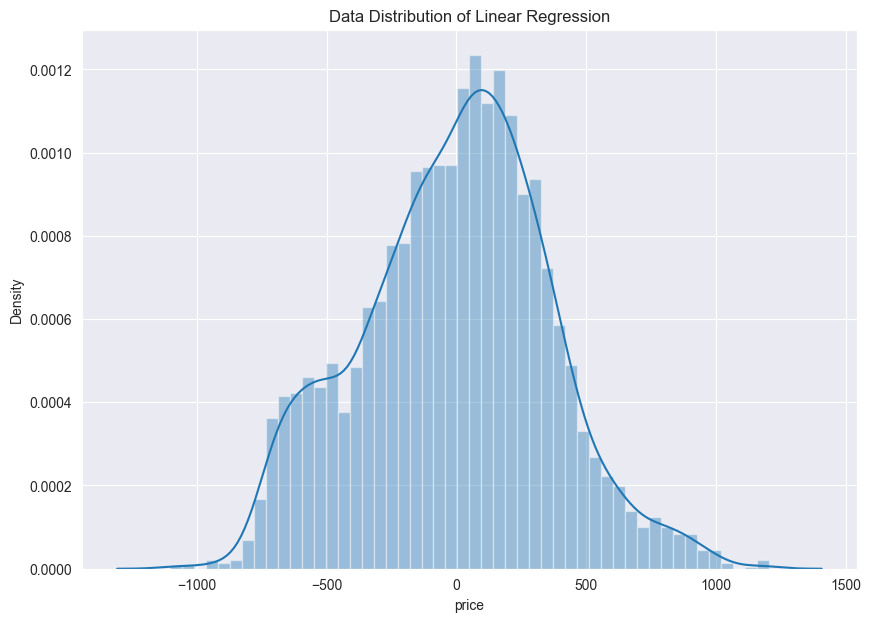

In [32]:
# Predicted data Distribution of Linear Regression.
plt.figure(figsize=(10, 7))
plt.title('Data Distribution of Linear Regression')
sns.distplot((y_test - y_pred_lin), bins=50)

### <font color='slategray3'>Linear Regression Accuracy</font>

In [33]:
# It will show if the model is overfitting or untrained.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# Showing if the model is overfitting to the training data.
train_accur_1 = r2_score(y_train, lin_reg.predict(X_train))


# Checking of accuracy.
if train_accur_1 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_1:.4f}')
  print('-------' * 5)
elif train_accur_1 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_1:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_1:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, lin_reg.predict(X_test)):.2f}')

# Score function.
linear_score = lin_reg.score(X_test, y_test)
print(f'Model Accuracy [score] is {linear_score:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Oops! Model is untrained.
Training Accuracy is 0.40
-----------------------------------
Model Accuracy [r2_score] is 0.38
Model Accuracy [score] is 0.38



In [34]:
# Error block.
print('--- Errors of Linear Regression ---\n')

mse_lin_reg = mean_squared_error(y_test, y_pred_lin)
print(f'Mean Squared Error: {mse_lin_reg:.2f}')

mae_lin_reg = mean_absolute_error(y_test, y_pred_lin)
print(f'Mean Absolute Error: {mae_lin_reg:.2f}')

--- Errors of Linear Regression ---

Mean Squared Error: 132048.24
Mean Absolute Error: 290.50


In [35]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_lin'.
result['predicted_price'] = y_pred_lin.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Linear Regression ---\n')
result.head()

--- Prediction by Linear Regression ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,836.989789
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,858.813452
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,790.003965
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,790.600429
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1014.312733


## <font color='lightpink4'>Decision Tree Regressor model</font>

In [36]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']


# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# Creating the Decision Tree Regressor model and fitting data.
dec_tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
DecisionTreeRegressor()

DecisionTreeRegressor()

== Prediction ==


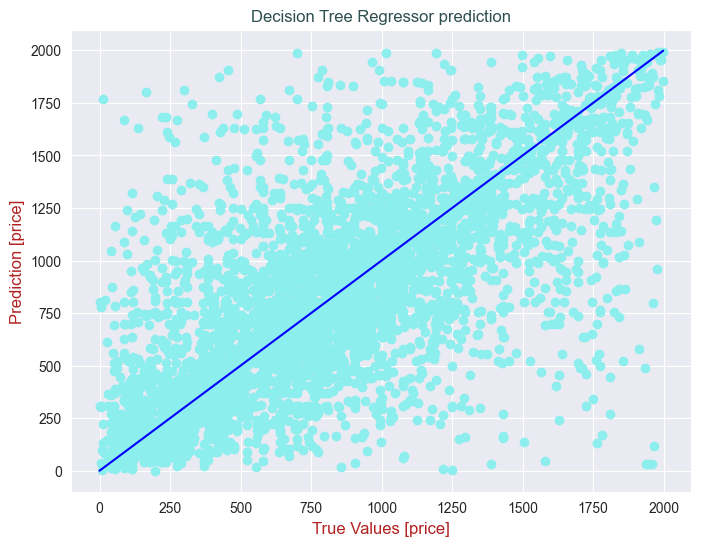

In [38]:
# Get prediction.
print('== Prediction ==')
y_pred_tree = dec_tree_reg.predict(X_test)

# VISUALIZATION OF PREDICTION.

# Plot with a Linear axes scales.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, color='#8DEEEE')
plt.yscale("linear")
plt.xscale('linear')

# Making lines of the plot.
line_1 = max(max(y_pred_tree), max(y_test))
line_2 = min(min(y_pred_tree), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'b')
plt.title('Decision Tree Regressor prediction', color='#2F4F4F')
plt.xlabel('True Values [price]', fontsize=12, color='#B22222')
plt.ylabel('Prediction [price]', fontsize=12, color='#B22222')
plt.show()

<AxesSubplot: title={'center': 'Price Distribution of Decision Tree Regressor'}, xlabel='price', ylabel='Density'>

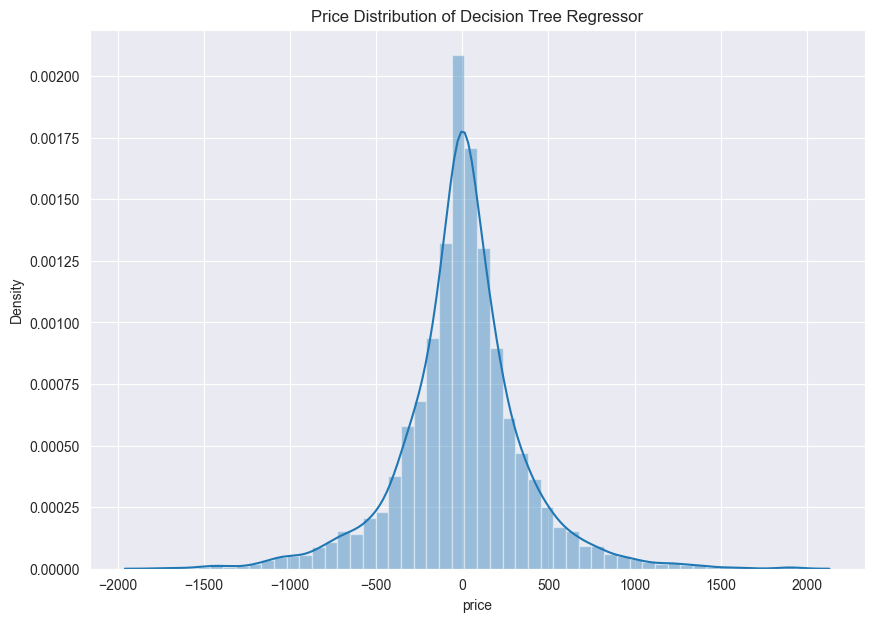

In [39]:
# Predicted data Distribution of Decision Tree Regressor.
plt.figure(figsize=(10, 7))
plt.title('Price Distribution of Decision Tree Regressor')
sns.distplot((y_test - y_pred_tree), bins=50)

### <font color='slategray3'>Accuracy of Decision Tree Regressor</font>

In [40]:
# It will show if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# Showing if the model is overfitting to the training data.
train_accur_2 = r2_score(y_train, dec_tree_reg.predict(X_train))


# Checking of accuracy.
if train_accur_2 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_2:.4f}')
  print('-------' * 5)
elif train_accur_2 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_2:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_2:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, dec_tree_reg.predict(X_test)):.2f}')

# Score function.
dec_tree_score = dec_tree_reg.score(X_test, y_test)
print(f'Model Accuracy [score] is {dec_tree_score:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Oops! Model is overfitting.
Training Accuracy is 0.9944
-----------------------------------
Model Accuracy [r2_score] is 0.40
Model Accuracy [score] is 0.40



In [41]:
# Error block.
print('--- Errors of Decision Tree Regressor ---\n')

mse_tree_reg = mean_squared_error(y_test, y_pred_tree)
print(f'Mean Squared Error: {mse_tree_reg:.2f}')

mae_tree_reg = mean_absolute_error(y_test, y_pred_tree)
print(f'Mean Absolute Error: {mae_tree_reg:.2f}')

--- Errors of Decision Tree Regressor ---

Mean Squared Error: 129011.98
Mean Absolute Error: 246.18


In [42]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_tree'.
result['predicted_price'] = y_pred_tree.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Decision Tree Regressor ---\n')
result.head()

--- Prediction by Decision Tree Regressor ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,1030.0
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,999.0
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,19.0
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,1257.0
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1578.0


## <font color='lightpink4'>Random Forest Regressor model<font>

In [43]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Creating the Random Forest Regressor model and fitting data.
rand_for_reg = RandomForestRegressor().fit(X_train, y_train)
RandomForestRegressor()

RandomForestRegressor()

== Prediction ==


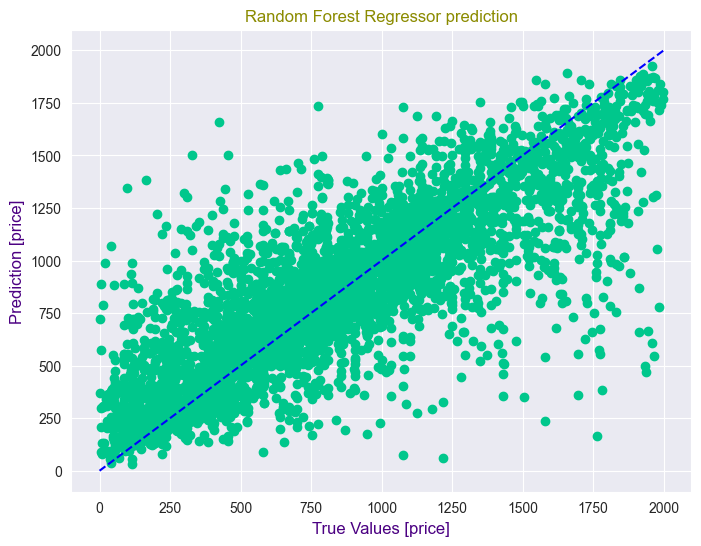

In [45]:
# Get prediction.
print('== Prediction ==')
y_pred_forest = rand_for_reg.predict(X_test)

# Visualization of prediction.

# Plot with a Linear axes scales.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_forest, color='#00C78C')
plt.yscale("linear")
plt.xscale('linear')

# Making lines of the plot.
line_1 = max(max(y_pred_forest), max(y_test))
line_2 = min(min(y_pred_forest), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'b--')
plt.title('Random Forest Regressor prediction', color='#8B8B00')
plt.xlabel('True Values [price]', fontsize=12, color='#4B0082')
plt.ylabel('Prediction [price]', fontsize=12, color='#4B0082')
plt.show()

<AxesSubplot: title={'center': 'Price Distribution of Random Forest Regressor'}, xlabel='price', ylabel='Density'>

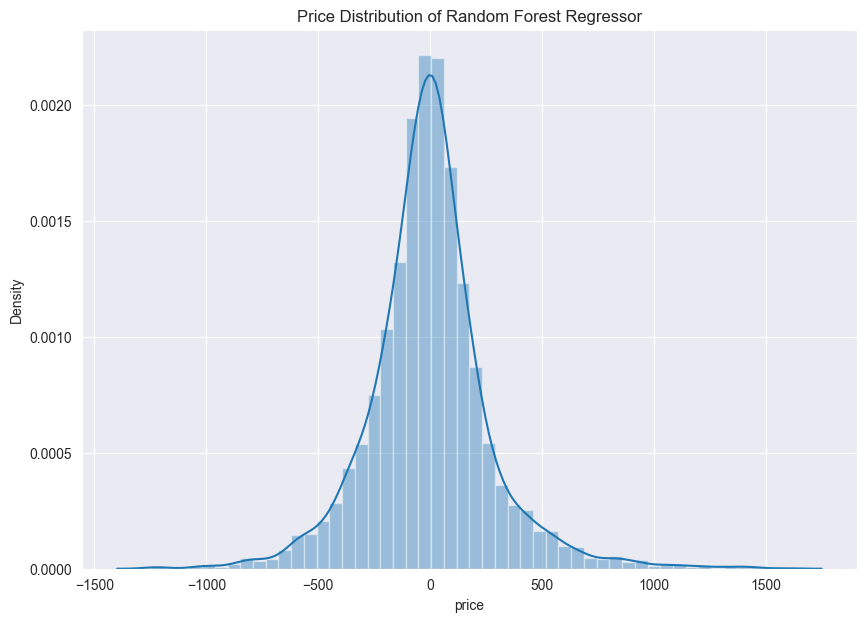

In [46]:
# Distribution of Random Forest Regressor.
plt.figure(figsize=(10, 7))
plt.title('Price Distribution of Random Forest Regressor')
sns.distplot((y_test - y_pred_forest), bins=50)

### <font color='slategray3'>Accuracy of Random Forest Regressor<font>

In [47]:
# It will show if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# Showing if the model is overfitting to the training data.
train_accur_3 = r2_score(y_train, rand_for_reg.predict(X_train))


# Checking of accuracy.
if train_accur_3 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_3:.4f}')
  print('-------' * 5)
elif train_accur_3 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_3:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_3:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, rand_for_reg.predict(X_test)):.2f}')

# Score function.
forest_score = rand_for_reg.score(X_test, y_test)
print(f'Model Accuracy [score] is {forest_score:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.95
Model Accuracy [r2_score] is 0.65
Model Accuracy [score] is 0.65



In [48]:
# Error block.
print('--- Errors of Random Forest Regressor ---\n')

mse_for_reg = mean_squared_error(y_test, y_pred_forest)
print(f'Mean Squared Error: {mse_for_reg:.2f}')

mae_for_reg = mean_absolute_error(y_test, y_pred_forest)
print(f'Mean Absolute Error: {mae_for_reg:.2f}')

--- Errors of Random Forest Regressor ---

Mean Squared Error: 73684.52
Mean Absolute Error: 188.93


In [49]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_forest'.
result['predicted_price'] = y_pred_forest.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Random Forest Regressor ---\n')
result.head()

--- Prediction by Random Forest Regressor ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,902.080
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,958.230
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,481.300
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,1206.503
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1214.690


## <font color='lightpink4'>Gradient Boosting Regressor model</font>

In [50]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# Creating RandomForestRegressor model and fitting data.
GBreg = GradientBoostingRegressor().fit(X_train, y_train)
GradientBoostingRegressor()

GradientBoostingRegressor()

== Prediction ==


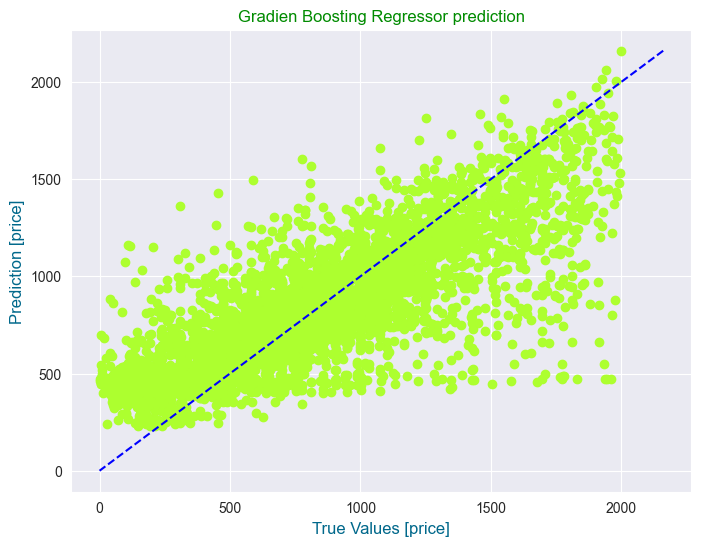

In [52]:
# Get prediction.
print('== Prediction ==')
y_pred_GBreg = GBreg.predict(X_test)

# Visualization of prediction.
# Plot with a Linear axes scales.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_GBreg, color='#ADFF2F')
plt.yscale("linear")
plt.xscale('linear')

# Making lines of the plot.
line_1 = max(max(y_pred_GBreg), max(y_test))
line_2 = min(min(y_pred_GBreg), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'b--')
plt.title('Gradien Boosting Regressor prediction', color='#008B00')
plt.xlabel('True Values [price]', fontsize=12, color='#00688B')
plt.ylabel('Prediction [price]', fontsize=12, color='#00688B')
plt.show()

<AxesSubplot: title={'center': 'Price Distribution of Gradient Boosting Regressor'}, xlabel='price', ylabel='Density'>

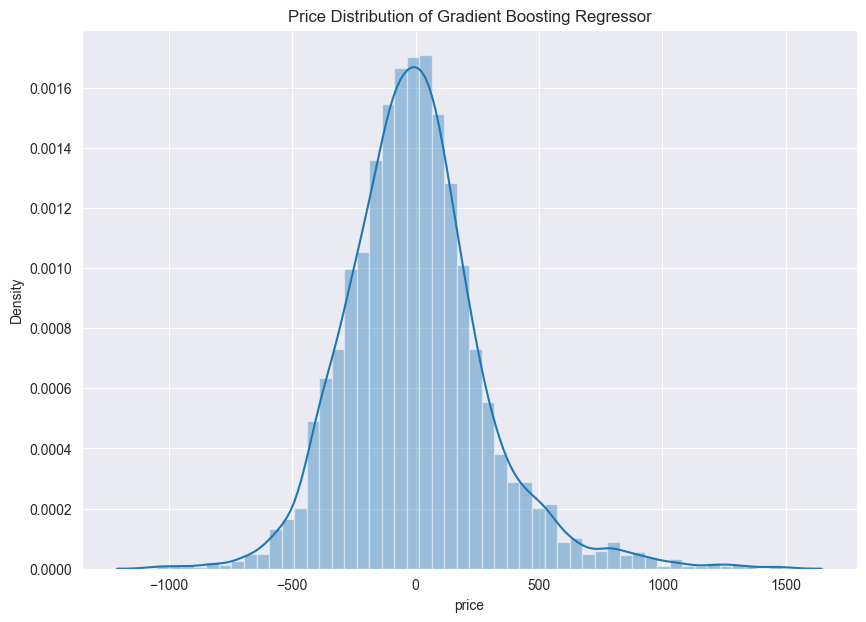

In [53]:
# Distribution of Gradient Boosting Regressor.
plt.figure(figsize=(10, 7))
plt.title('Price Distribution of Gradient Boosting Regressor')
sns.distplot((y_test - y_pred_GBreg), bins=50)

### <font color='slategray3'>Accuracy of Gradient Boosting Regressor</font>

In [54]:
# It will show if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# Showing if the model is overfitting to the training data.
train_accur_4 = r2_score(y_train, GBreg.predict(X_train))


# Checking of accuracy.
if train_accur_4 > 0.98:
  print('Oops! Model is overfitting')
  print(f'Training Accuracy is {train_accur_4:.4f}')
  print('-------' * 5)
elif train_accur_4 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_4:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_4:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, y_pred_GBreg):.2f}')

# Score function
GBreg_score = GBreg.score(X_test, y_test)
print(f'Model Accuracy [score] is {GBreg_score:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.64
Model Accuracy [r2_score] is 0.62
Model Accuracy [score] is 0.62



In [55]:
# Error block.
print('--- Errors of Gradient Boosting Regressor ---\n')

mse_GBreg = mean_squared_error(y_test, y_pred_GBreg)
print(f'Mean Squared Error: {mse_GBreg:.2f}')

mae_GBreg = mean_absolute_error(y_test, y_pred_GBreg)
print(f'Mean Absolute Error: {mae_GBreg:.2f}')

--- Errors of Gradient Boosting Regressor ---

Mean Squared Error: 80198.41
Mean Absolute Error: 209.65


In [56]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_GBreg'.
result['predicted_price'] = y_pred_GBreg.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Gradient Boosting Regressor ---\n')
result.head()

--- Prediction by Gradient Boosting Regressor ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,943.583246
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,959.564787
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,680.715618
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,696.452432
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1294.370363


## <font color='darkred'>Comparison of Single algorithms</font>

In [57]:
# Initialize data of lists with scores.
data_1 = {'Scores': [f'{linear_score:.2f}',
                     f'{dec_tree_score:.2f}',
                     f'{forest_score:.2f}',
                     f'{GBreg_score:.2f}',]}

# Creates pandas DataFrame.
df_compare_1 = pd.DataFrame(data_1,
                            index=['Linear Regression',
                                   'Decision Tree Regressor',
                                   'Random Forest Regressor',
                                   'Gradient Boosting Regressor'])

print('--- Comparison of single algorithms ---\n')
df_compare_1

--- Comparison of single algorithms ---



,Scores
Linear Regression,0.38
Decision Tree Regressor,0.40
Random Forest Regressor,0.65
Gradient Boosting Regressor,0.62


### <font color='cobalt'><em>Because of the best result with the Random Forest Regressor and Gradient Boosting Regressor I will further improve these models with hyperparameters.</em></font>

### <font color='browm'>The next step is to apply ensemble models.</font>

# <font color='red'> Ensemble models</font>

## <font color='lightpink4'> Stacking Regressor</font>

In [58]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
# Basic algorithm of models.
estimators = [('lr', LinearRegression()),
              ('dt', DecisionTreeRegressor()),
              ('rf', RandomForestRegressor()),
              ('gb', GradientBoostingRegressor())]

# Final algorithm to forecast.
final_estimator = GradientBoostingRegressor(random_state=42)

# Object of the model.
Stacking_model = StackingRegressor(estimators=estimators,
                                   final_estimator=final_estimator).fit(X_train, y_train)

Stacking_model

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor()),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=GradientBoostingRegressor(random_state=42))

In [60]:
# Predictor object.
y_pred_Stacking = Stacking_model.predict(X_test)


# It will show if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# Showing if the model is overfitting to the training data.
train_accur_5 = r2_score(y_train, Stacking_model.predict(X_train))


# Checking of accuracy.
if train_accur_5 > 0.98:
  print('Oops! Model is overfitting')
  print(f'Training Accuracy is {train_accur_5:.4f}')
  print('-------' * 5)
elif train_accur_5 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_5:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_5:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, y_pred_Stacking):.2f}')

# Score function.
Stacking_score = Stacking_model.score(X_test, y_test)
print(f'Model accuracy [score] is {Stacking_score:.2f}')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.85
Model Accuracy [r2_score] is 0.67
Model accuracy [score] is 0.67


In [61]:
# Error block.
print('--- Errors of Stacking Regressor ---\n')

mse_Stacking = mean_squared_error(y_test, y_pred_Stacking)
print(f'Mean Squared Error: {mse_Stacking:.2f}')

mae_Stacking = mean_absolute_error(y_test, y_pred_Stacking)
print(f'Mean Absolute Error: {mae_Stacking:.2f}')

--- Errors of Stacking Regressor ---

Mean Squared Error: 71135.02
Mean Absolute Error: 188.80


## <font color='lightpink4'>Bagging Regressor</font>

In [62]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
# Object of the model.
Bagging_model = BaggingRegressor(estimator=RandomForestRegressor(),
                                 random_state=42).fit(X_train, y_train)

Bagging_model

BaggingRegressor(estimator=RandomForestRegressor(), random_state=42)

In [64]:
# Predictor object.
y_pred_Bagging = Bagging_model.predict(X_test)


# It will show if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# Showing if the model is overfitting to the training data.
train_accur_6 = r2_score(y_train, Bagging_model.predict(X_train))


# Checking of accuracy.
if train_accur_6 > 0.98:
  print('Oops! Model is overfitting')
  print(f'Training Accuracy is {train_accur_6:.4f}')
  print('-------' * 5)
elif train_accur_6 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_6:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_6:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, y_pred_Bagging):.2f}')

# Score function.
Bagging_score = Bagging_model.score(X_test, y_test)
print(f'Model accuracy [score] is {Bagging_score:.2f}')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.87
Model Accuracy [r2_score] is 0.67
Model accuracy [score] is 0.67


In [65]:
# Error block.
print('--- Errors of Bagging Regressor: ---')

mse_Bagging = mean_squared_error(y_test, y_pred_Bagging)
print(f'Mean Squared Error: {mse_Bagging:.2f}')

mae_Bagging = mean_absolute_error(y_test, y_pred_Bagging)
print(f'Mean Absolute Error: {mae_Bagging:.2f}')

--- Errors of Bagging Regressor: ---
Mean Squared Error: 71104.29
Mean Absolute Error: 187.39


## <font color='lightpink4'>Ada Boost Regressor</font>

In [67]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
# Object of the model.
AdaBoost_model = AdaBoostRegressor(estimator=RandomForestRegressor(),
                                random_state=42).fit(X_train, y_train)

AdaBoost_model

AdaBoostRegressor(estimator=RandomForestRegressor(), random_state=42)

In [69]:
# Predictor object.
y_pred_AdaBoost = AdaBoost_model.predict(X_test)

# It will show if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# Showing if the model is overfitting to the training data.
train_accur_7 = r2_score(y_train, AdaBoost_model.predict(X_train))


# Checking of accuracy.
if train_accur_7 > 0.98:
  print('Oops! Model is overfitting')
  print(f'Training Accuracy is {train_accur_7:.4f}')
  print('-------' * 5)
elif train_accur_7 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_7:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_7:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, y_pred_AdaBoost):.2f}')

# Score function.
AdaBoost_score = AdaBoost_model.score(X_test, y_test)
print(f'Model accuracy [score] is {AdaBoost_score:.2f}')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.95
Model Accuracy [r2_score] is 0.66
Model accuracy [score] is 0.66


In [70]:
# Error block.
print('--- Errors of Ada Boost Regressor: ---')

mse_AdaBoost = mean_squared_error(y_test, y_pred_AdaBoost)
print(f'Mean Squared Error: {mse_AdaBoost:.2f}')

mae_AdaBoost = mean_absolute_error(y_test, y_pred_AdaBoost)
print(f'Mean Absolute Error: {mae_AdaBoost:.2f}')

--- Errors of Ada Boost Regressor: ---
Mean Squared Error: 71950.26
Mean Absolute Error: 188.57


## <font color='lightpink4'>XGB Regressor</font>



In [71]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
# Object of the model.
XGB_model = XGBRegressor(random_state=42).fit(X_train, y_train)

XGB_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [73]:
# Predictor object.
y_pred_XGB = XGB_model.predict(X_test)

# It will show if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# Showing if the model is overfitting to the training data.
train_accur_8 = r2_score(y_train, XGB_model.predict(X_train))

# Checking of accuracy.
if train_accur_8 > 0.98:
  print('Oops! Model is overfitting')
  print(f'Training Accuracy is {train_accur_8:.4f}')
  print('-------' * 5)
elif train_accur_8 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_8:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_8:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, y_pred_XGB):.2f}')

# Score function.
XGB_score = XGB_model.score(X_test, y_test)
print(f'Model accuracy [score] is {XGB_score:.2f}')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.86
Model Accuracy [r2_score] is 0.71
Model accuracy [score] is 0.71


In [75]:
# Error block.
print('--- Errors of Gradient Boosting Regressor ---\n')

mse_Boosting = mean_squared_error(y_test, y_pred_XGB)
print(f'Mean Squared Error: {mse_Boosting:.2f}')

mae_Boosting = mean_absolute_error(y_test, y_pred_XGB)
print(f'Mean Absolute Error: {mae_Boosting:.2f}')

--- Errors of Gradient Boosting Regressor ---

Mean Squared Error: 61119.36
Mean Absolute Error: 172.22


## <font color='cobalt'><em>Because of the best result with the XGB Regressor among other ensembles I will display a prediction.</em></font>

In [76]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_GBreg'.
result['predicted_price'] = y_pred_XGB.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Gradient Boosting Regressor ---\n')
result.head()

--- Prediction by Gradient Boosting Regressor ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,859.383362
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,1028.140259
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,562.529114
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,847.935242
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1276.973755


## <font color='khaki4'>Visualization of XGB Regressor prediction</font>

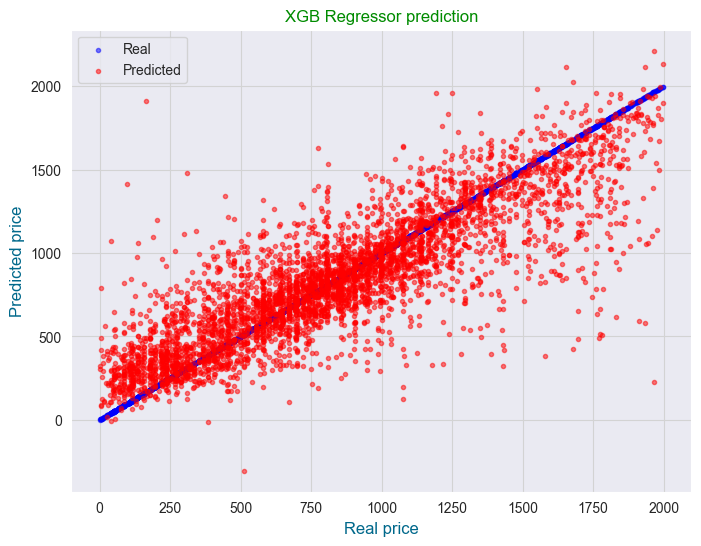

In [77]:
# Define x axis
x_axis = X_test.actual_price

# Build scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x_axis, y_test, c='blue', alpha=0.5, marker='.', label='Real')
plt.scatter(x_axis, y_pred_XGB, c='red', alpha=0.5, marker='.', label='Predicted')
plt.title('XGB Regressor prediction', color='#008B00')
plt.xlabel('Real price', fontsize=12, color='#00688B')
plt.ylabel('Predicted price', fontsize=12, color='#00688B')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(loc='upper left')
plt.show()

## <font color='darkred'>Comparison of Ensemble algorithms</font>

In [78]:
# Initialize data of lists with scores.
data_2 = {'Scores': [f'{Stacking_score:.2f}',
                     f'{Bagging_score:.2f}',
                     f'{AdaBoost_score:.2f}',
                     f'{XGB_score:.2f}']}

# Creates pandas DataFrame.
df_compare_2 = pd.DataFrame(data_2,
                            index=['Stacking Regressor',
                                   'Bagging Regressor',
                                   'Ada Boost Regressor',
                                   'XGB Regressor'])

print('--- Comparison of ensemble algorithms ---')
df_compare_2

--- Comparison of ensemble algorithms ---


,Scores
Stacking Regressor,0.67
Bagging Regressor,0.67
Ada Boost Regressor,0.66
XGB Regressor,0.71


# <center><font color='blue'>Stage 6. Hyperparameters</font></center>

## <font color='indianred3'>Grid Search CV for Random Forest Regressor</font>

In [79]:
# Initialisation of parameters to find the best one (0.694).
param_grid_1 = {
    'n_estimators': [100, 200, 300],
    'max_features': [1, 2, 3, 4],
    'min_samples_split': [2, 4, 6, 8],
    'max_depth': [25, 30, 35, 40]
}



# Note:
'''n_estimators - the number of trees in the forest (default=100).
   max_features - the number of features to consider when looking for the best split.
   min_samples_split - the minimum number of samples required to split the code.
   min_samples_leaf - the minimum number of samples required to be at a leaf node.
   max_leaf_nodes - the maximum number of leaf nodes.
   max_depth - the maximum depth of the tree.
   cv - the cross-validation splitting strategy:
        None, to use the default 5-fold cross validation.
   n_job - the number of jobs to run in parallel:
        default=None; -1 means using all processors.
   verbose - controls the verbosity: the higher, the more messages.'''



# Application of parameters for Random Forest Regressor.
grid_search_1 = GridSearchCV(rand_for_reg, param_grid_1, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1, verbose=3)

grid_search_1

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [25, 30, 35, 40],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [82]:
# Time function.
start_time = time.time()

# Fitting the Grid Search CV.
grid_search_1.fit(X_train, y_train)

# Measuring execution time of training (start, end).
elapsed_time = time.time() - start_time
print('Training time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Training time: 00:24:42


#### <font color='gray'>Because of long time processing it is need to restart X, y values.</font>

In [83]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [84]:
# Show the best result for the Random Forest Regressor.
grid_search_1.best_estimator_

RandomForestRegressor(max_depth=30, max_features=1, min_samples_split=6,
                      n_estimators=300)

In [85]:
# Checking of accuracy after the Grid Search CV.
grid_accuracy_1 = grid_search_1.best_estimator_
grid_score_1 = grid_accuracy_1.score(X_test, y_test)
print(f'The best Score after the Grid Search CV: {grid_score_1:.3f}')

The best Score after the Grid Search CV: 0.693


## <font color='indigo'>Random Forest Regressor after the Grid Search CV</font>

In [86]:
# Random Forest Regressor model with hyperparameters.
grid_forest = RandomForestRegressor(max_depth=30, max_features=1, min_samples_split=6,
                      n_estimators=300).fit(X_train, y_train)
RandomForestRegressor()

RandomForestRegressor()

###  <font color='khaki4'>Accuracy of Random Forest Regressor after the Grid Search CV</font>

In [87]:
# Get prediction.
y_pred_grid = grid_forest.predict(X_test)

# Model evaluation.
forest_grid_score = grid_forest.score(X_test, y_test)
print(f'\nScore of Random Forest Regressor: {forest_grid_score:.3f}')

# Improvement of Random Forest Regressor after Grid Search CV.
print(f'Improvement: {100 * (grid_score_1 - forest_score) / forest_score:0.2f}%.\n')

# Verifying accuracy.
print('--- Errors of Random Forest Regressor ---\n')

mse_grid_forest = mean_squared_error(y_test, y_pred_grid)
print(f'Mean Squared Error: {mse_grid_forest:.2f}')

mae_grid_forest = mean_absolute_error(y_test, y_pred_grid)
print(f'Mean Absolute Error: {mae_grid_forest:.2f}')


Score of Random Forest Regressor: 0.693
Improvement: 5.87%.

--- Errors of Random Forest Regressor ---

Mean Squared Error: 65581.88
Mean Absolute Error: 181.01


In [88]:
# Prediction of the house prices and comparing them
# with the real prices after used hyperparameters.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_grid_forest'.
result['predicted_price'] = y_pred_grid.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Random Forest Regressor after Grid Search ---\n')
result.head()

--- Prediction by Random Forest Regressor after Grid Search ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,904.844626
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,951.982644
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,487.849262
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,1094.610866
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1098.874550


## <font color='khaki4'>Visualization of prediction after Grid Search CV</font>

== Prediction ==


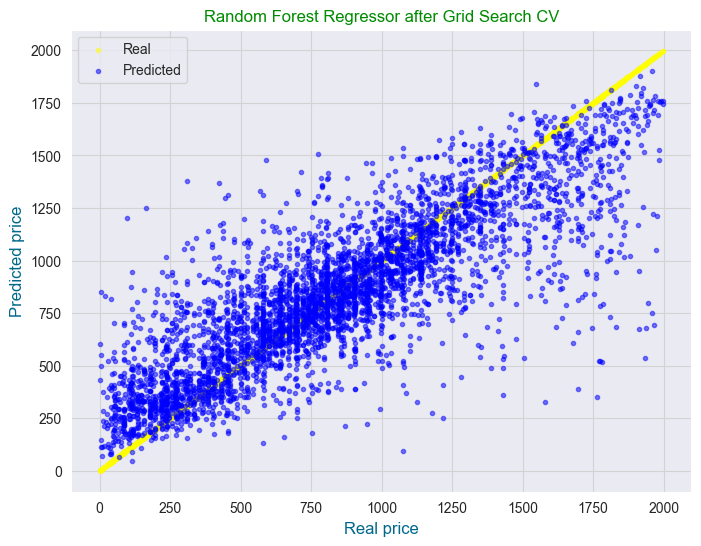

In [89]:
# Get prediction.
print('== Prediction ==')

# Define X axis
X_axis = X_test.actual_price

# Build scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(X_axis, y_test, c='yellow', alpha=0.5, marker='.', label='Real')
plt.scatter(X_axis, y_pred_grid, c='blue', alpha=0.5, marker='.', label='Predicted')
plt.title('Random Forest Regressor after Grid Search CV', color='#008B00')
plt.xlabel('Real price', fontsize=12, color='#00688B')
plt.ylabel('Predicted price', fontsize=12, color='#00688B')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc='upper left')
plt.show()

## <font color='indianred3'>Grid Search CV for Gradient Boosting Regressor</font>

In [90]:
# Initialisation of parameters to find the best one (0.694).
param_grid_2 = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth': [3, 7, 9],
    'min_samples_split': [5, 7, 9],
    'criterion':['friedman_mse', 'squared_error']
}


# Application of parameters for Gradient Boosting Regressor.
grid_search_2 = GridSearchCV(GBreg, param_grid_2, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1, verbose=3)


grid_search_2

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 7, 9], 'min_samples_split': [5, 7, 9],
                         'n_estimators': [10, 50, 100, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [91]:
# Time function.
start_time = time.time()

# Fitting the Grid Search CV.
grid_search_2.fit(X_train, y_train)

# Measuring execution time of training (start, end).
elapsed_time = time.time() - start_time
print('Training time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Training time: 01:12:07


#### <font color='gray'>Because of long time processing it is need to restart X, y values.</font>

In [114]:
# Split the dataset into X, y values.
# Values for learning: all columns except the column 'price'.
X = df_realtor_new.drop(['price'], axis=1)

# Target values.
y = df_realtor_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
# Show the best result for the Gradient Boosting Regressor.
grid_search_2.best_estimator_

GradientBoostingRegressor(criterion='squared_error', max_depth=7,
                          min_samples_split=9, n_estimators=500)

In [95]:
# Checking of accuracy after the Grid Search CV.
grid_accuracy_2 = grid_search_2.best_estimator_
grid_score_2 = grid_accuracy_2.score(X_test, y_test)
print(f'The best Score after the Grid Search CV: {grid_score_2:.3f}')

The best Score after the Grid Search CV: 0.717


## <font color='indigo'>Gradient Boosting Regressor after the Grid Search CV</font>

In [96]:
# Gradient Boosting Regressor model with hyperparameters.
grid_boosting = GradientBoostingRegressor(criterion='squared_error', max_depth=7,
                          min_samples_split=9, n_estimators=500).fit(X_train, y_train)
grid_boosting

GradientBoostingRegressor(criterion='squared_error', max_depth=7,
                          min_samples_split=9, n_estimators=500)

###  <font color='khaki4'>Accuracy of Gradient Boosting Regressor after the Grid Search CV</font>

In [97]:
# Get prediction.
y_pred_boosting = grid_boosting.predict(X_test)

# Model evaluation.
boosting_grid_score = grid_boosting.score(X_test, y_test)
print(f'\nScore of Gradient Boosting Regressor: {boosting_grid_score:.3f}')

# Improvement of Gradient Boosting Regressor after Grid Search CV.
print(f'Improvement: {100 * (grid_score_2 - GBreg_score) / GBreg_score:0.2f}%.\n')

# Verifying accuracy.
print('--- Errors of Gradient Boosting Regressor ---\n')

mse_grid_boosting = mean_squared_error(y_test, y_pred_grid)
print(f'Mean Squared Error: {mse_grid_boosting:.2f}')

mae_grid_boosting = mean_absolute_error(y_test, y_pred_grid)
print(f'Mean Absolute Error: {mae_grid_boosting:.2f}')


Score of Gradient Boosting Regressor: 0.717
Improvement: 14.83%.

--- Errors of Gradient Boosting Regressor ---

Mean Squared Error: 65581.88
Mean Absolute Error: 181.01


In [99]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_grid_forest'.
result['predicted_price'] = y_pred_grid.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Gradient Boosting Regressor after Grid Seardh ---\n')
result.head()

--- Prediction by Gradient Boosting Regressor after Grid Seardh ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,904.844626
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,951.982644
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,487.849262
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,1094.610866
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1098.874550


## <font color='khaki4'>Visualization of prediction after Grid Search CV</font>

== Prediction ==


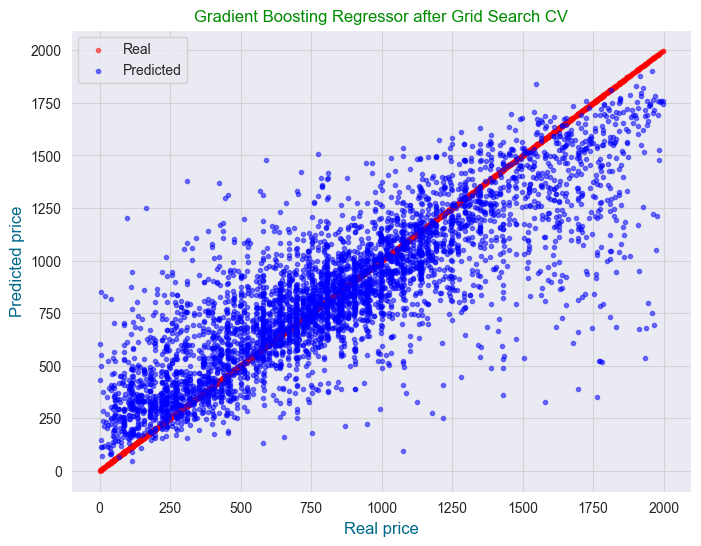

In [100]:
# Get prediction.
print('== Prediction ==')

# Define X axis
X_axis = X_test.actual_price

# Build scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(X_axis, y_test, c='red', alpha=0.5, marker='.', label='Real')
plt.scatter(X_axis, y_pred_grid, c='blue', alpha=0.5, marker='.', label='Predicted')
plt.title('Gradient Boosting Regressor after Grid Search CV', color='#008B00')
plt.xlabel('Real price', fontsize=12, color='#00688B')
plt.ylabel('Predicted price', fontsize=12, color='#00688B')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc='upper left')
plt.show()

# <center><font color='blue'>Stage 6. Сonclusions</font></center>

### <font color='red'>The best result among algorithms was shown by Random Forest Regressor and Gradient Boosting Regressor after used Grid Search hyperparameters, and by ensemble XGB Regressor.</font>

In [101]:
# Initialize data of lists with scores.
data_3 = {'Scores': [f'{forest_grid_score:.3f}',
                     f'{boosting_grid_score:.3f}',
                     f'{XGB_score:.3f}']}

# Creates pandas DataFrame.
df_compare_3 = pd.DataFrame(data_3,
                            index=['Random Forest Regressor',
                                   'Gradient Boosting Regressor',
                                   'XGB Regressor'])

print('--- Comparison of the best models ---')
df_compare_3

--- Comparison of the best models ---


,Scores
Random Forest Regressor,0.693
Gradient Boosting Regressor,0.717
XGB Regressor,0.714


## <font color='green'>Because of the best score of Gradient Boosting Regressor I will make a dashboard to know how this model works.</font>

# <font color='red-orange'>Building interactive dashboard</font>

## <font color='gray'>It allows users to understand as well as explain how the model works and how it is deciding the outcome</font>

In [115]:
# Setting up the Dashboard for Gradient Boosting Regressor  model.
explainer = RegressionExplainer(grid_boosting, X_test, y_test)

# Start the Dashboard
db = ExplainerDashboard(explainer, title='Price Prediction', whatif=False)

# Running the app on a local port 8000
db.run(port=8000)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks.

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8000): Max retries exceeded with url: /_alive_4eff908c-6ccd-48ca-a8b7-80021e33cd2f (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002400C0B4700>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

In [ ]:
# Link which was created after run interactive dashboard.
# http://192.168.88.253:8000/